In [18]:
import pandas as pd

In [19]:
df = pd.DataFrame(
{
    'name':['Ali','Zahid','Ubaid'],
    'age':[18,20,18]
}
)

In [20]:
df['age']=df['age'].replace({18:25 })

In [21]:
df

,name,age
0,Ali,25
1,Zahid,20
2,Ubaid,25


In [22]:
df.iloc[0,1]=27 # 0--- ROW,1 ---COLUMN

In [23]:
df

,name,age
0,Ali,27
1,Zahid,20
2,Ubaid,25


In [24]:
# REPLACING USING LIST
df['name'].replace(['Ali','Zahid'],['No name', ' '])

0    No name
1           
2      Ubaid
Name: name, dtype: object

In [25]:
#REPLACING USING DICTIONARY
df['name'].replace({'Ali':'No name','Zahid': ' '})

0    No name
1           
2      Ubaid
Name: name, dtype: object

In [26]:
# IF WE WANT TO REPLACE MULTIPLE THINGS WITH ONE 
df['name'].replace(['Ali','Zahid'],'No name')

0    No name
1    No name
2      Ubaid
Name: name, dtype: object

In [27]:
df # same hai dataframe jese shuru me bani thi changing nahi hui 

,name,age
0,Ali,27
1,Zahid,20
2,Ubaid,25


In [30]:
# agr hum dataframe me bhi chnage karna chahte tou aese karenge
# IF WE WANT TO REPLACE MULTIPLE THINGS WITH ONE 
# inplace se dataframe me change hojata hai
df['name'].replace(['Ali','Zahid'],'No name',inplace=True)
df

,name,age
0,No name,27
1,No name,20
2,Ubaid,25


In [13]:
# Map ----kissi bhi column par transformation apply karne ke liye use karte hain
# map hum 2 tareeke se use karsakte ya tou hum dictionary se karlen ya function ke through

In [26]:
# USING MAP BY USING FUNCTION
df['age'].map(lambda age: 'Older' if age>25  else 'Younger')

0      Older
1    Younger
2    Younger
Name: age, dtype: object

In [38]:
# USING MAP BY USING DICTIONARY
data = pd.DataFrame({'Food':['bacon','pulled pork','bacon','Pastrami','corned beef','Bacon','pastrami',
                             'honey ham','nova lox'],
                     'ounces':[4,3,12,6,7.5,8,3,5,6]})
data

,Food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [55]:
# USING MAP BY USING DICTIONARY
meat_to_animal={
    'bacon':'pig',
    'pulled pork':'pig',
    'corned beef':'cow',
    'honey ham':'cow',
    'nova lox':'salmon',
    'pastrami':'salmon'
}

In [56]:
# USING MAP BY USING DICTIONARY
lowercased=data['Food'].str.lower()
lowercased

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: Food, dtype: object

In [57]:
# USING MAP BY USING DICTIONARY
data['animal']=lowercased.map(meat_to_animal)
data['animal']

0       pig
1       pig
2       pig
3    salmon
4       cow
5       pig
6    salmon
7       cow
8    salmon
Name: animal, dtype: object

In [58]:
# USING MAP BY USING FUNCTION
data['Food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3    salmon
4       cow
5       pig
6    salmon
7       cow
8    salmon
Name: Food, dtype: object

In [27]:
#Assignment: What is the difference between map and apply
# map specific column par kaam karta hai
# apply poore frame par apply karsakte hain

In [59]:
import numpy as np

In [60]:
df = pd.DataFrame(
    np.arange(0,12).reshape(3,4),
    index=['A','B','C'],
    columns = ['C1','C2','C3','C4']
)

In [63]:
display(df)
print(df.loc['A'])
print() # new line
print(df.iloc[1])

,C1,C2,C3,C4
A,0,1,2,3
B,4,5,6,7
C,8,9,10,11


C1    0
C2    1
C3    2
C4    3
Name: A, dtype: int32

C1    4
C2    5
C3    6
C4    7
Name: B, dtype: int32


In [42]:
#We can also apply map to index. Map can be used to convert a specific column or index to a new value

In [64]:
df.index

Index(['A', 'B', 'C'], dtype='object')

In [65]:
index_to_country = {
    'A': 'Australia',
    'B': 'Brazil',
    'C': 'China'
}

In [66]:
df.index = df.index.map(index_to_country)

In [68]:
df

,C1,C2,C3,C4
Australia,0,1,2,3
Brazil,4,5,6,7
China,8,9,10,11


In [69]:
df.loc['Australia']

C1    0
C2    1
C3    2
C4    3
Name: Australia, dtype: int32

In [43]:
# Other index methods

In [70]:
df.rename(index=str.upper, columns=str.lower) #Changing columns to lower case / index to uppper case

,c1,c2,c3,c4
AUSTRALIA,0,1,2,3
BRAZIL,4,5,6,7
CHINA,8,9,10,11


In [71]:
df.rename(index={'China': 'Coulambia'}, 
            columns={'C1': 'C11'}) #Changing specific column and index

,C11,C2,C3,C4
Australia,0,1,2,3
Brazil,4,5,6,7
Coulambia,8,9,10,11


In [72]:
df.rename(index={'China': 'Columabia'}, inplace=True) #doing inplace

In [73]:
df

,C1,C2,C3,C4
Australia,0,1,2,3
Brazil,4,5,6,7
Columabia,8,9,10,11


In [75]:
#Discretization and binning: To place items into respective buckets/ bins if they lie in a specific range

In [77]:
# 88+ -> A
# 75-87 -> B
# 60-74 -> C
# <60 -> F

In [78]:
marks = [90, 22, 25, 67, 81, 83, 87] 
bins = [0,60,75, 88,100] # bins are groups here,we have 4 groups ,the ranges of these groups are showing on above cell in comments(0 not included ----1 to 60,61 to 76,75 to88,89to 100) 
cats = pd.cut(marks, bins)

In [79]:
cats.codes # 90 in 3rd category ,22 in 0 category,25 in 0 category,67 in 1st category and so on 

array([3, 0, 0, 1, 2, 2, 2], dtype=int8)

In [80]:
cats.categories

IntervalIndex([(0, 60], (60, 75], (75, 88], (88, 100]], dtype='interval[int64, right]')

In [82]:
# (,) - closed interval, exclusive
# [ , ] - open interval, inclusive

In [83]:
pd.value_counts(cats)

(75, 88]     3
(0, 60]      2
(60, 75]     1
(88, 100]    1
dtype: int64

In [85]:
cats = pd.cut(marks, bins,labels=['F','C','B','A']) # name the categories

In [86]:
pd.value_counts(cats)

B    3
F    2
C    1
A    1
dtype: int64

In [88]:
print(cats.categories)
print(cats.codes)

Index(['F', 'C', 'B', 'A'], dtype='object')
[3 0 0 1 2 2 2]


In [89]:
marks

[90, 22, 25, 67, 81, 83, 87]

In [90]:
#descriptive statistics, outliers removal

In [92]:
df.describe()

,C1,C2,C3,C4
count,3.0,3.0,3.0,3.0
mean,4.0,5.0,6.0,7.0
std,4.0,4.0,4.0,4.0
min,0.0,1.0,2.0,3.0
25%,2.0,3.0,4.0,5.0
50%,4.0,5.0,6.0,7.0
75%,6.0,7.0,8.0,9.0
max,8.0,9.0,10.0,11.0


In [73]:
df[np.abs(df['C2']) > 5] # here we set range 5 if value is greater then five it is considered as outlier(aesi value jese age 900 nahi hosakti agr likhi hui ho age 900 tou usse outlier kahenge)

,C1,C2,C3,C4
Columabia,8,9,10,11


In [75]:
#Capping data outside the range
#Capping putting the value on the edge values

df[np.abs(df['C2']) > 5] = np.sign(df) * 5   # -7 -> -5,  8->5

# abs --- absolute isliye use kia ke negative me bhi ye consider kare is range ko matlab age
# -6 ajai tou ye usse bhi outlier me count kare par -5 tak ki values ko na kare

# jo data greater than 5 hai matlab outlier hai humme usse range me le aainge matlab agr 7 hai 
# tou usse 5 kardenge agr -6 hai tou usse -5 kardenge 

In [76]:
df

,C1,C2,C3,C4
Australia,0,1,2,3
Brazil,4,5,6,7
Columabia,5,5,5,5


In [77]:
#Merging two data frames: It's similar to SQL joins. We join two data frame based on a common column

In [95]:
df1 = pd.DataFrame(
    {
        'Id':[1,2,3],
        'Names':['John','Peter','Silbert']
    }
)

In [96]:
df2 = pd.DataFrame(
    {
        'Id':[1,2,3],
        'Salary':['150','170','190']
    }
)

In [98]:
display(df1)
display(df2)

,Id,Names
0,1,John
1,2,Peter
2,3,Silbert


,Id,Salary
0,1,150
1,2,170
2,3,190


In [82]:
pd.merge(df1,df2)  # after merging ,ye itna intelligent hai ke isne dekha ke id ka column same hai tou usne usko aik hi bar likha

,Id,Names,Salary
0,1,John,150
1,2,Peter,170
2,3,Silbert,190


In [99]:
df2 = pd.DataFrame(
    {
        'Emp_Id':[1,2,3],
        'Salary':['150','170','190']
    }
)

In [100]:
#When the common column name doesn't match

In [102]:
pd.merge(df1, df2, left_on='Id', right_on='Emp_Id')

,Id,Names,Emp_Id,Salary
0,1,John,1,150
1,2,Peter,2,170
2,3,Silbert,3,190


In [103]:
#Different types of joins

In [105]:
df2 = pd.DataFrame(
    {
        'Id':[1,2,3,4],
        'Salary':['150','170','190','90']
    }
)

In [106]:
pd.merge(df1,df2,how='right')

,Id,Names,Salary
0,1,John,150
1,2,Peter,170
2,3,Silbert,190
3,4,NaN,90


In [108]:
#Merging based on indexes

In [109]:
df2 = pd.DataFrame(
    {
        'Salary':['150','170','190','90']
    },
            index=[1,2,3,4],
)

In [110]:
display(df1)
display(df2)

,Id,Names
0,1,John
1,2,Peter
2,3,Silbert


,Salary
1,150
2,170
3,190
4,90


In [111]:
pd.merge(df1,df2,left_on='Id',right_index=True)

,Id,Names,Salary
0,1,John,150
1,2,Peter,170
2,3,Silbert,190


In [112]:
#Concatenating two dataframes

In [113]:
df1

,Id,Names
0,1,John
1,2,Peter
2,3,Silbert


In [115]:
df2 = pd.DataFrame(
    {
        'Id':[4,5],
        'Names':['Ryo','Pawan']
    }
)

In [116]:
pd.concat([df1,df2]) #Row-wise concatenation

,Id,Names
0,1,John
1,2,Peter
2,3,Silbert
0,4,Ryo
1,5,Pawan


In [117]:
pd.concat([df1,df2],axis=1) #Column-wise concatenation

,Id,Names,Id,Names
0,1,John,4.0,Ryo
1,2,Peter,5.0,Pawan
2,3,Silbert,NaN,NaN


In [111]:
#combine first

In [118]:
df1 = pd.DataFrame(
    {
        'Id':[1,2,3],
        'Names':['John','Peter','Silbert'],
        'Ages':[np.nan,'40',np.nan]
    }
)

In [119]:
df2 = pd.DataFrame(
    {
        'Id':[1,2,3],
        'Ages':['23',np.nan,'40']
    }
)

In [120]:
display(df1)
display(df2)

,Id,Names,Ages
0,1,John,NaN
1,2,Peter,40
2,3,Silbert,NaN


,Id,Ages
0,1,23
1,2,NaN
2,3,40


In [121]:
df1.combine_first(df2)

,Ages,Id,Names
0,23,1,John
1,40,2,Peter
2,40,3,Silbert


In [122]:
#Assignment: Combine First example from book

#### DATA VISULAIZATION

In [123]:
#Matplotlib: A library for data visualization. You can draw bar graphs, pie charts and other plots

In [124]:
import matplotlib.pyplot as plt

In [125]:
%matplotlib inline # MATLAB ISSI BROWSER PAR HI DRAWING KAREGA ISSI JUPYTER PAR HI SHOW HOGA

In [129]:
x=np.arange(0,2*3.14,0.1) # (START,END,STEPS)

In [130]:
y=np.sin(x)

Text(0.5, 1.0, 'Graph of Sin x')

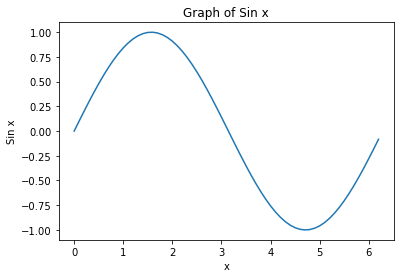

In [132]:
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('Sin x')
plt.title('Graph of Sin x')

In [134]:
x = np.linspace(-1,1,100) # 2POINTS KE DRAMIYAN ME POINTS LESAKTE MATLAB 0 SE LEKAR 1 TAK KI VALUES KO 100 HISO ME DIVIDE KARDO

In [135]:
y=x**2

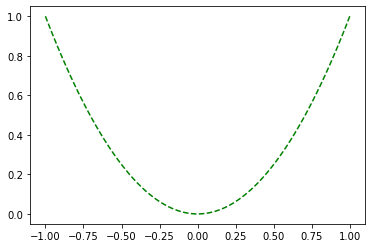

In [136]:
plt.plot(x,y,'g--') # g= green,-- = DASHED LINE

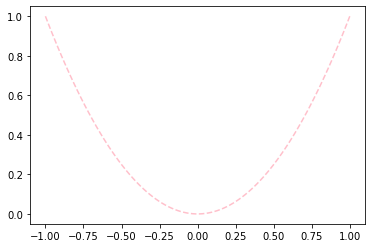

In [139]:
plt.plot(x,y,color='pink',linestyle='dashed')


(0.0, 2.0)

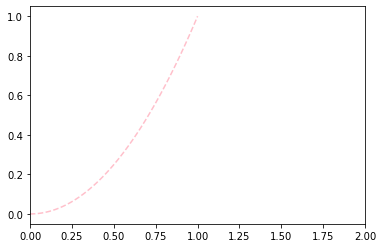

In [142]:
plt.plot(x,y,color='pink',linestyle='dashed')

plt.xlim(0,2) # XLIM ====XLIMIT

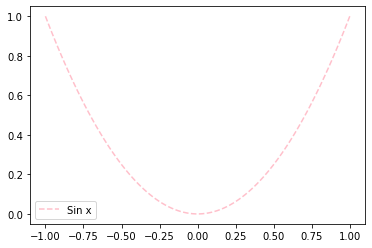

In [143]:
plt.plot(x,y,color='pink',linestyle='dashed',label='Sin x')
plt.legend()

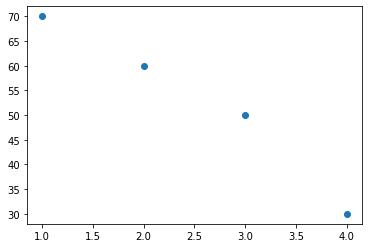

In [144]:
#Scatter
plt.scatter([1,2,3,4],[70,60,50,30])

In [145]:
from sklearn.datasets import load_iris
iris = load_iris()  #Load the Iris data
iris #Show the iris data: data/ features and target

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Text(0, 0.5, 'sepal width (cm)')

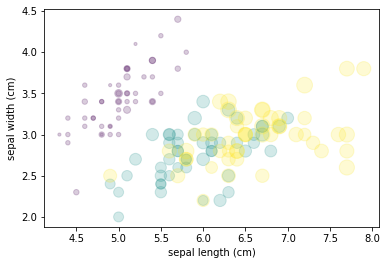

In [149]:
features = iris.data.T #Transpose the data(COLUMN WISE)
plt.scatter(features[0], features[1], alpha=0.2, s=100*features[3], c=iris.target, cmap='viridis') 
plt.xlabel(iris.feature_names[0]) 
plt.ylabel(iris.feature_names[1])

#Position - feature[0], feature[1] ---- SEPAL LENGTH ,SEPAL WIDTH
#Size - Feature[3] --- PETAL LENGTH 
# s=100*features[3] ---- JISKI PETAL LENGTH CHOTI HO USSE CHOTA DIKHAIN JISKI BARI HO USSE BARA,100 SE ISLIYE MULTIPLY KI KUINKE VALUE BAHUT CHOTI THI AUR PLOTTING NAZAR NA ATI 
#Color - Target (Virginica,Setosa, ...) ----- (HAR PLANT ALG COLOR ME SHOW HO)
#alpha - transparency(TRANSPARENT KARDETA)
# cmap='viridis' ----- THEME